In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv('./selected_indicators/CDA_ind.csv')
df_new =  (
    df.drop(['code', 'iso'], axis=1)
    .set_index(['country']).rename_axis([None])
    .T.reset_index() # Transpose teh original dataset 
    .assign(index=lambda x: x['index'].str[-4:])
    .set_index('index')
    .rename_axis(None)
    .replace(-8888, np.nan)
)

df_new

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
1995,0.000000,100.000000,34.015600,NaN,2.134042,NaN,28.638141,28.709388,65.749736,10.593885,...,20.515704,50.241340,25.547484,15.299772,0.000000,NaN,NaN,15.544092,70.086144,60.650485
1996,0.000000,100.000000,34.015600,NaN,2.134042,NaN,28.638141,28.709388,65.749736,10.593885,...,20.515704,50.241340,25.547484,15.299772,0.000000,NaN,NaN,15.544092,70.086144,60.650485
1997,0.000000,100.000000,34.015600,NaN,2.134042,NaN,28.638141,28.709388,65.749736,10.593885,...,20.515704,50.241340,25.547484,15.299772,0.000000,NaN,NaN,15.544092,70.086144,60.650485
1998,0.000000,100.000000,34.015600,NaN,2.134042,NaN,28.638141,28.709388,65.749736,10.593885,...,20.515704,50.241340,25.547484,15.299772,0.000000,NaN,NaN,15.544092,70.086144,60.650485
1999,0.000000,100.000000,34.015600,NaN,2.134042,NaN,28.638141,28.709388,65.749736,10.593885,...,20.515704,50.241340,25.547484,15.299772,0.000000,NaN,NaN,15.544092,70.086144,60.650485
2000,0.000000,70.711776,39.507944,NaN,7.996337,NaN,22.963218,29.613071,60.450662,0.000000,...,27.870150,47.259556,22.835312,13.047796,0.000000,NaN,NaN,7.146259,80.483280,67.865435
2001,0.000000,31.235373,46.288313,NaN,16.020780,NaN,20.614809,32.854428,54.050373,0.000000,...,33.369319,40.193521,20.524930,10.474879,0.000000,NaN,NaN,1.699950,83.313881,77.531327
2002,0.000000,9.009048,50.189674,NaN,25.391659,NaN,17.762767,37.991844,35.089080,0.000000,...,37.466840,36.825488,24.656384,12.531216,0.000000,NaN,NaN,0.000000,76.990220,77.972072
2003,0.000000,0.000000,52.633144,NaN,32.521894,NaN,14.772714,42.051871,38.776405,0.000000,...,47.171202,33.386707,31.122095,13.099367,0.000000,NaN,NaN,2.968303,65.664572,73.749844
2004,0.000000,0.000000,56.195851,NaN,59.583613,NaN,14.375318,41.177809,40.153917,0.000000,...,50.787704,33.765270,51.842922,25.036151,0.000000,NaN,NaN,3.604949,54.094371,64.374679


In [3]:
selected_countries = ['United States of America', 'China', 'India', 'Germany', 'South Africa', 'Australia', 'Brazil'] 
selected_df = df_new.loc[:, selected_countries]
selected_df

,United States of America,China,India,Germany,South Africa,Australia,Brazil
1995,40.022508,24.255197,14.025763,71.481626,35.518132,33.932440,16.812473
1996,40.022508,24.255197,14.025763,71.481626,35.518132,33.932440,16.812473
1997,40.022508,24.255197,14.025763,71.481626,35.518132,33.932440,16.812473
1998,40.022508,24.255197,14.025763,71.481626,35.518132,33.932440,16.812473
1999,40.022508,24.255197,14.025763,71.481626,35.518132,33.932440,16.812473
2000,38.988874,28.974760,15.684962,64.269802,33.277960,32.869710,16.502633
2001,40.088260,33.481228,18.710206,58.212041,34.281739,34.158782,17.374118
2002,41.197609,35.108062,22.138150,57.267443,40.557270,34.356940,21.883595
2003,42.208955,30.820532,25.593435,57.037434,42.394879,35.414752,27.679925
2004,42.955854,22.250162,27.480816,57.751313,40.369163,37.505466,32.715141


In [4]:
df_long = (selected_df.reset_index()
           .melt(id_vars='index', var_name='country', value_name='value')
           .astype({'index': 'float64'}))
df_long

,index,country,value
0,1995.0,United States of America,40.022508
1,1996.0,United States of America,40.022508
2,1997.0,United States of America,40.022508
3,1998.0,United States of America,40.022508
4,1999.0,United States of America,40.022508
...,...,...,...
191,2018.0,Brazil,33.356741
192,2019.0,Brazil,42.882716
193,2020.0,Brazil,42.882716
194,2021.0,Brazil,42.882716


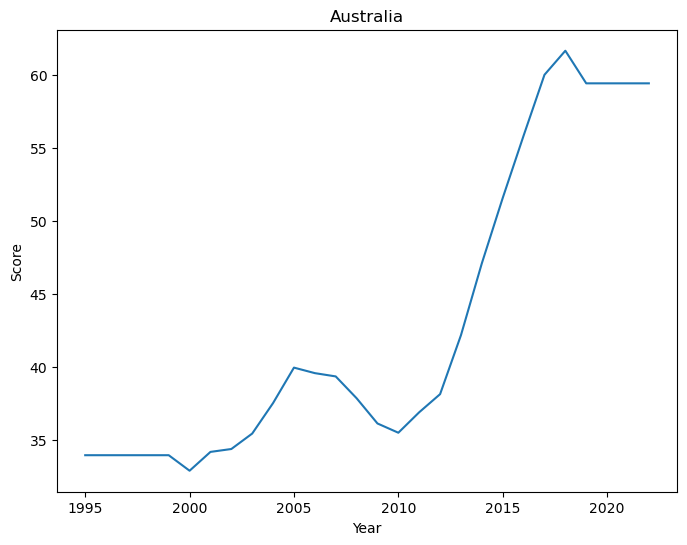

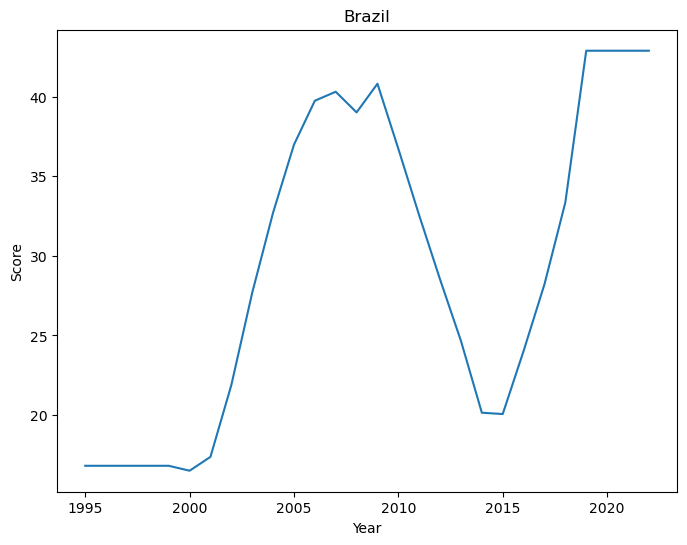

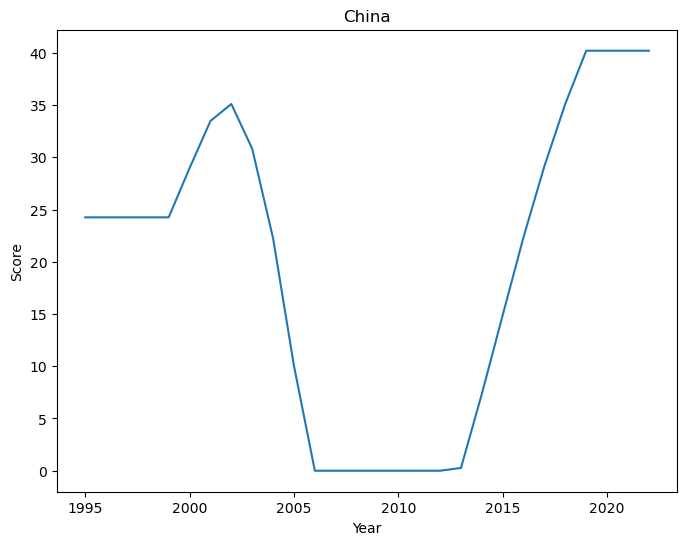

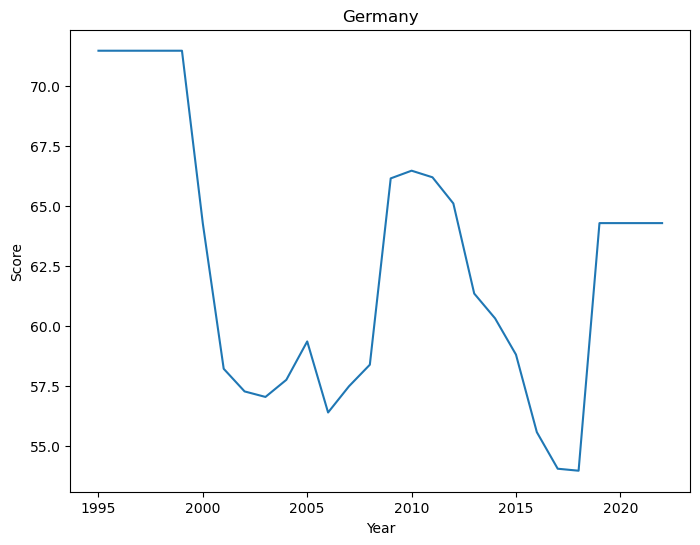

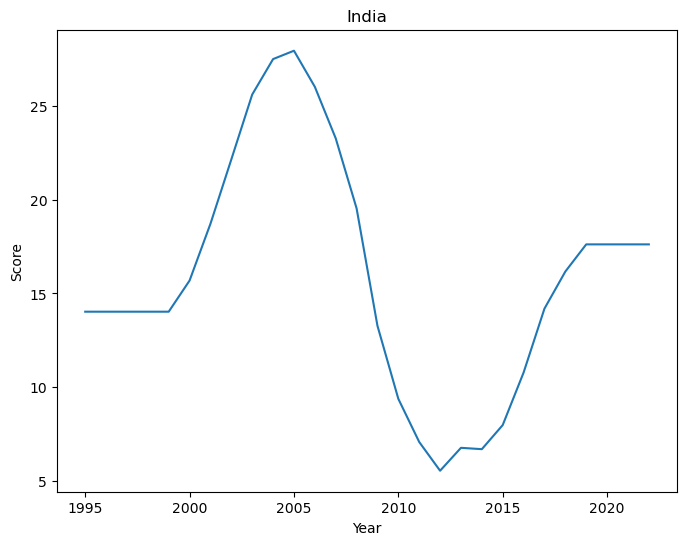

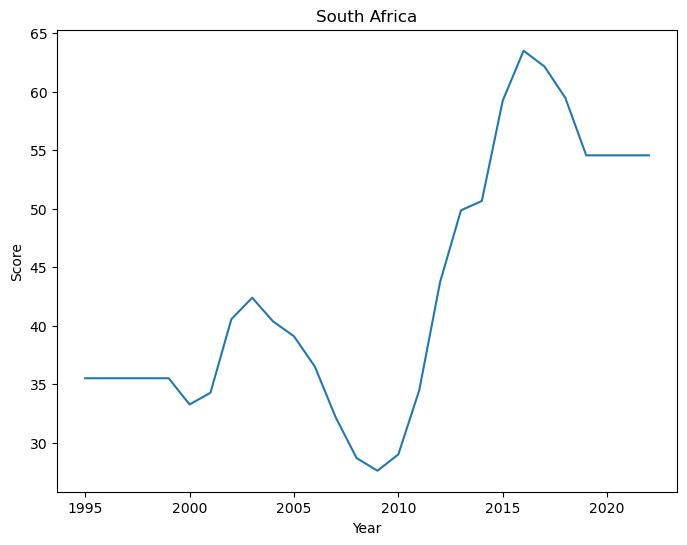

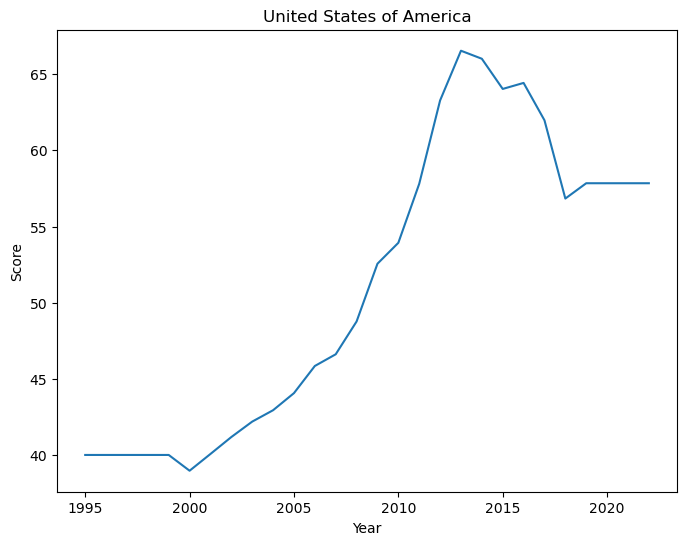

In [5]:
for country, data in df_long.groupby('country'):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.plot(data['index'], data['value'], label=country)
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Score')

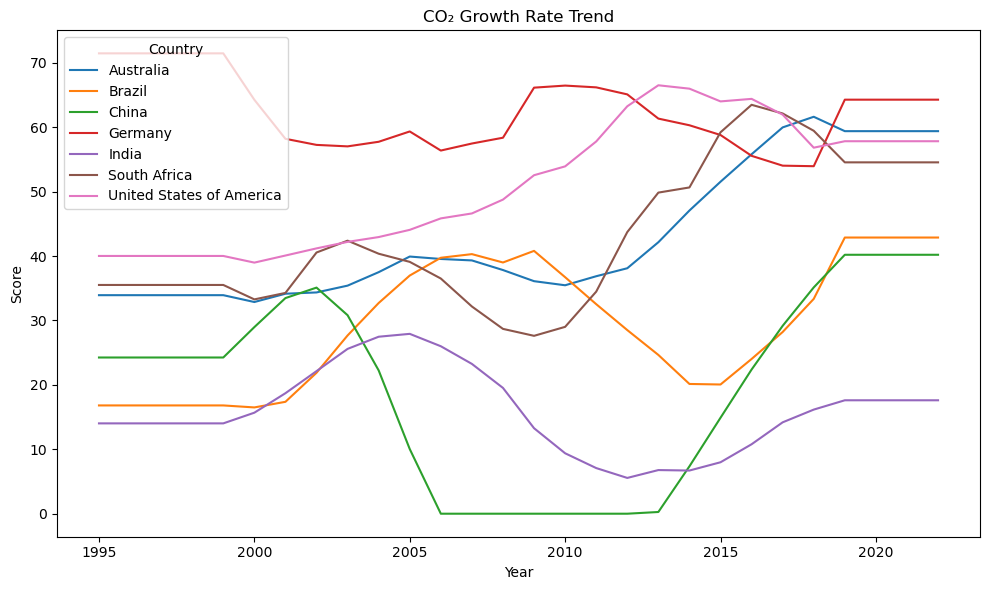

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

for country, data in df_long.groupby('country'):
    ax.plot(data['index'], data['value'], label=country)

ax.set_title('CO\u2082 Growth Rate Trend')
ax.set_xlabel('Year')
ax.set_ylabel('Score')
ax.legend(loc='best', title='Country') 

fig.tight_layout()
plt.savefig("CDA.png")
plt.show()